In [1]:
from pandas import Series, DataFrame
import pandas as pd
import math
import re
df = pd.read_csv('C:\Users\ckraw\Downloads\\NYC_Restaurants.csv', dtype=unicode)

Q1.)

In [2]:
Row_list = []
for index, rows in df.iterrows(): 
    restaurants =[rows.DBA, rows.BUILDING, rows.STREET, rows.ZIPCODE, rows.BORO] # Create list for the current row
    makeitastring = ' '.join(map(str, restaurants))
    Row_list.append(makeitastring) # append the list to the final list
    
df['RESTAURANT'] = Row_list
print df.loc[1]

Unnamed: 0                                                               1
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         10F
VIOLATION DESCRIPTION    Non-food contact surface improperly constructe...
CRITICAL FLAG            

Q2.)

In [3]:
rc = df.RESTAURANT.nunique()
print rc

10114


Q3.)

In [6]:
chain_cnt = df[['DBA','BORO','BUILDING','STREET','ZIPCODE']].drop_duplicates()['DBA'].value_counts()
mask = chain_cnt > 1
chain_count = len(chain_cnt[mask])
print chain_count

368


Q4.)

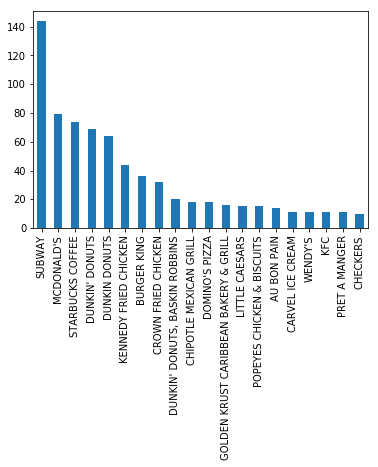

In [7]:
chain_cnt.iloc[:20].plot(kind='bar')

Q5.)

In [8]:
chain_count1 = chain_cnt[mask].sum()
chain_pct = (chain_count1/float(rc))*100
print chain_pct

16.47221672928614


Q6.)

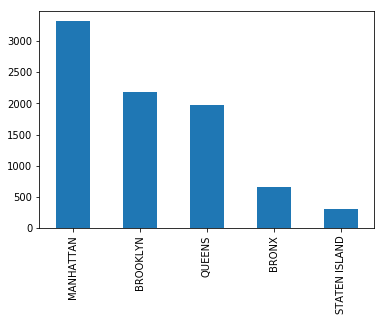

In [11]:
mask1 = chain_cnt ==1
non_chain = chain_cnt[mask1]
non_chain1 = (pd.Series(non_chain.index.values, index=non_chain )).tolist()
mask2 = df['DBA'].isin(non_chain1)
df2 = df[mask2]
mask3 = df2.BORO != 'Missing'
df2 = df2[mask3]
df2[['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts().plot(kind='bar')

Q7.)

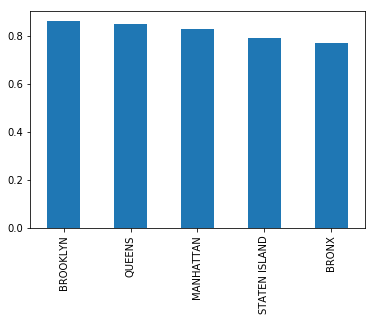

In [73]:
df3 = df2[['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts()
df4 = df[['BORO','RESTAURANT']].drop_duplicates()['BORO'].value_counts()
df4 = df4.drop(labels = ['Missing'])
fraction = df3/df4
fraction.sort_values(ascending=False).plot(kind = 'bar')

Q8.)

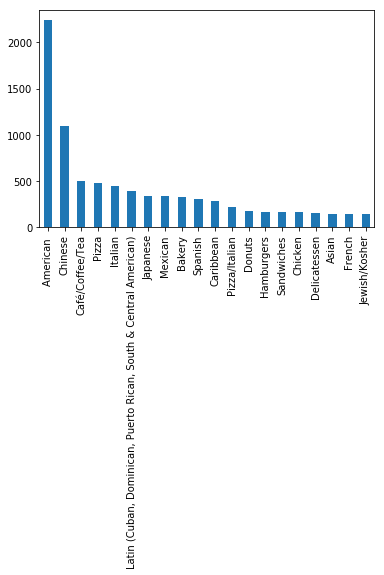

In [15]:
cui_cnt = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
cui_cnt.iloc[:20].plot(kind='bar')

Q9.)

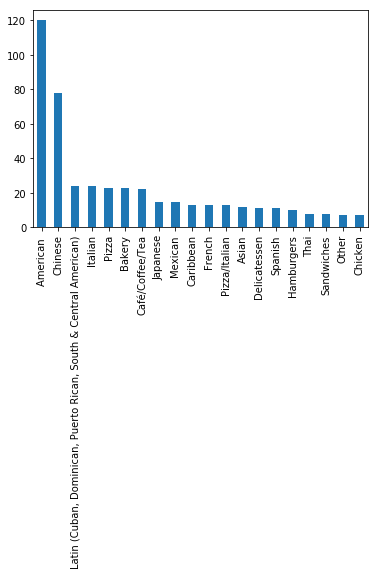

In [16]:
mask4 = df['VIOLATION CODE'].isnull()
df1 = df[mask4]
clean_cnt = df1[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
clean_cnt.iloc[:20].plot(kind='bar')

Q10.)

In [20]:
mask5 = df['CUISINE DESCRIPTION'].value_counts() > 19
ratio = clean_cnt[mask5]/cui_cnt[mask5]
ratio.sort_values(ascending=False).iloc[:20]
#ratio.sort_values(ascending=False).iloc[:20].plot(kind = 'bar')


Creole                           0.181818
Chinese/Cuban                    0.181818
Bangladeshi                      0.150000
Russian                          0.111111
Peruvian                         0.107143
Soups & Sandwiches               0.095238
Barbecue                         0.095238
Continental                      0.095238
Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
French                           0.089041
Tex-Mex                          0.086207
Tapas                            0.083333
Asian                            0.082192
Delicatessen                     0.071895
German                           0.071429
Chinese                          0.071038
Bakery                           0.070552
Other                            0.067961
Middle Eastern                   0.064103
Name: CUISINE DESCRIPTION, dtype: float64

Q11.)

In [25]:
ct = pd.crosstab(df['VIOLATION CODE'], df['BORO'],margins=False)
ct = ct.drop(columns = ['Missing'])
print ct.idxmax()

BORO
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object


Q12.)

In [30]:
ctn = ct.apply(lambda r: r/r.sum(), axis=1)
ctn = ctn.idxmax().tolist()
df5 = df[['VIOLATION CODE','VIOLATION DESCRIPTION']].drop_duplicates()
mask6 = df5['VIOLATION CODE'].isin(ctn)
df5[mask6]

,VIOLATION CODE,VIOLATION DESCRIPTION
1165,03C,"Eggs found dirty/cracked; liquid, frozen or po..."
3383,02D,Precooked potentially hazardous food from comm...
6592,04I,Unprotected food re-served.
27710,03G,Raw food not properly washed prior to serving.
33097,03E,Potable water supply inadequate. Water or ice ...


Q13.)

In [247]:
df8 = df[['ZIPCODE','PHONE']].drop_duplicates()
df8 = df8.values.tolist()
for i in range(0,len(df8),1):
    df8[i][1] = re.findall('^[\d]{0,3}',df8[i][1])
    df8[i][1] = "".join(df8[i][1])
df9 = DataFrame.from_records(df8,columns = ['ZIPCODE','PHONE'])
df9 = df9[['ZIPCODE','PHONE']].drop_duplicates()
df10 = df9['PHONE'].value_counts()
mask9 = df9['PHONE'].value_counts() == 1
df10 = df10[mask9]
df10 = pd.Series(df10.index.values, index=df10 )
df10.nunique()


34

Q14.)

In [295]:
streetType = ""
streetType2 = []
for index, rows in df.iterrows(): 
    streetType=[rows.STREET] # Create list for the current row
    streetType = " ".join(streetType)
   # streetType = streetType.join("")
    streetType = re.findall('\s(\w+)$',streetType)
    streetType2.append(streetType)
df['STREET TYPE'] = streetType2
#print df.loc[1]

x.split("")[-1]

In [309]:
street2=[]
for index, rows in df.iterrows(): 
    street=[rows.STREET] # Create list for the current row
    street = " ".join(street)
    street = re.findall('\w+',street)
    street = street[0:-1]
    street2.append(street)
street2

[['FLATBUSH'],
 ['FLATBUSH'],
 ['FLATBUSH'],
 ['FLATBUSH'],
 ['FLATBUSH'],
 ['63'],
 ['63'],
 ['63'],
 ['63'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['ASTORIA'],
 ['SUTTER'],
 ['SUTTER'],
 ['SUTTER'],
 ['SUTTER'],
 ['SUTTER'],
 ['SUTTER'],
 ['KINGS'],
 ['KINGS'],
 ['CHURCH'],
 ['CHURCH'],
 ['3'],
 ['3'],
 ['3'],
 ['3'],
 ['EAST', '74'],
 ['PROSPECT', 'PARK'],
 ['PROSPECT', 'PARK'],
 ['PROSPECT', 'PARK'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['COLUMBUS'],
 ['COURT'],
 ['COURT'],
 ['5'],
 ['5'],
 ['5'],
 ['5'],
 ['5'],
 ['238', 'SPOFFORD'],
 ['238', 'SPOFFORD'],
 ['238', 'SPOFFORD'],
 ['238', 'SPOFFORD'],
 ['VICTORY'],
 ['VICTORY'],
 ['VICTORY'],
 ['VICTORY'],
 ['METROPOLITAN'],
 ['WEST', '72'],
 ['WEST', '72'],
 ['WEST', '72'],
 ['AVENUE'],
 ['AVENUE'],
 ['AVENUE'],
 ['AVENUE'],
 ['NEW', 'DORP'],
 ['NEW', 'DORP'],
 ['NEW', 'DORP'],
 ['GIFFORDS'],
 ['GIFFORDS'],
 ['GIFFORDS'],
 ['GIFFORDS'],
 ['GIFFORDS'],
 ['FULTON'],
 ['FULTON'],
 ['FULTON'

In [296]:
#print df['RESTAURANT'].iloc[0:10]
df

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,STREET TYPE,STREET BASE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,[AVENUE],[]
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,[AVENUE],[]
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,[AVENUE],[]
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,[AVENUE],[]
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,[AVENUE],[]
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,[ROAD],[]
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,[ROAD],[]
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,[ROAD],[]
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,...,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,[ROAD],[]
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,...,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,[BOULEVARD],[]
